# **Hierarchichal Clustering**

Hierarchical clustering is an unsupervised machine learning technique that builds a tree-like hierarchy of nested clusters from data. 

It operates in two main ways: agglomerative (bottom-up), which merges data points into larger clusters, and divisive (top-down), which splits a large cluster into smaller ones.

The results are often visualized using a dendrogram, a tree diagram that shows the relationships and similarities between clusters.

* Agglomorative Hierarchichal clustering
* Divisive Hierarchichal custering

## **Agglomorative Hierarchichal clustering**

In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
# generating data

X, y = make_blobs(
    n_samples=50,
    centers=3,
    cluster_std=1.2,
    random_state=45
)

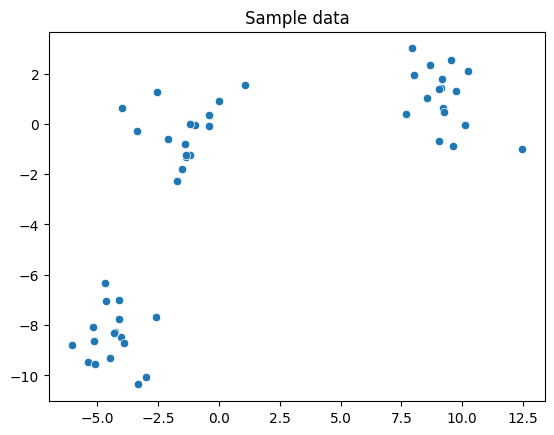

In [18]:
# ploting the data
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("Sample data")
plt.show()

In [19]:
# agglomorative hierarchichal clustering
# ward, complete, average, single are common methods

linked = linkage(X, method='ward')

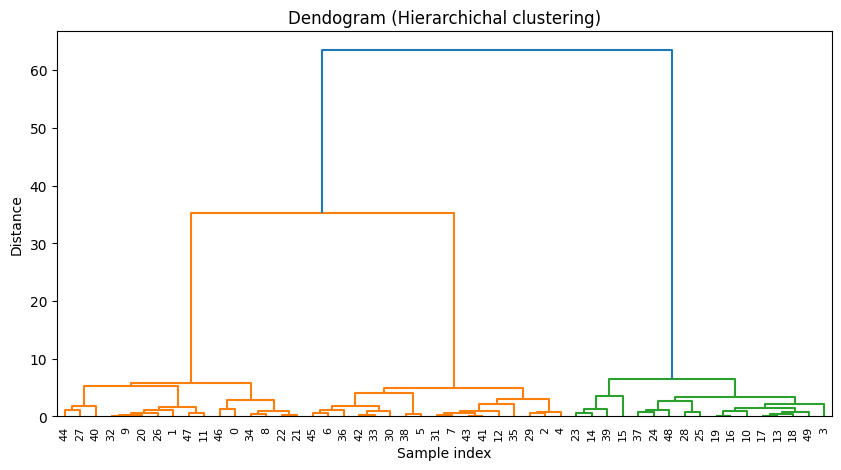

In [29]:
plt.figure(figsize=(10, 5))
dendrogram(
    linked,
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title("Dendogram (Hierarchichal clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [23]:
# fitting the agglomorative clustering

n_clusters = 3
agg_clust = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
labels = agg_clust.fit_predict(X)

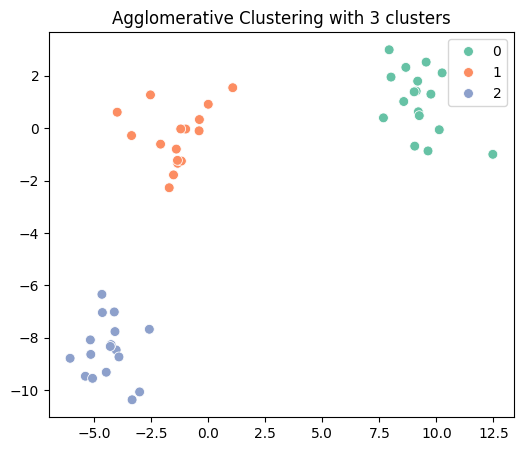

In [24]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s = 50)
plt.title(f"Agglomerative Clustering with {n_clusters} clusters")
plt.show()

In [25]:
# score

score = silhouette_score(X, labels)
print(f"Silhouette score for {n_clusters} clusters: {score:.4f}")

Silhouette score for 3 clusters: 0.7897


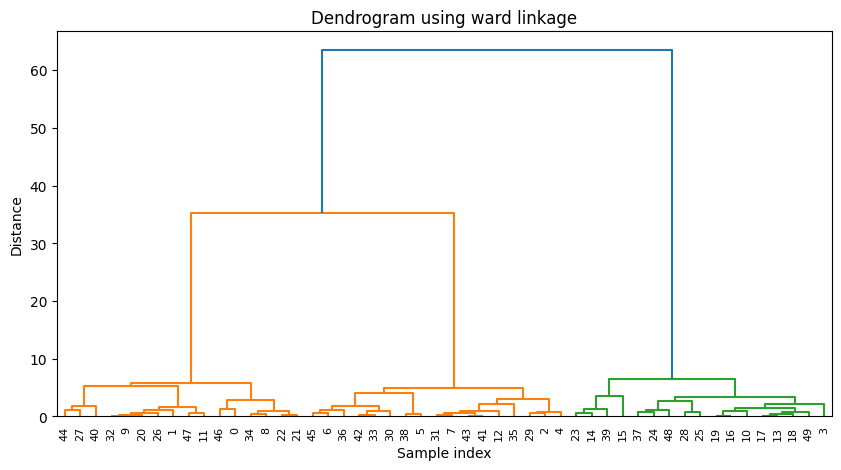

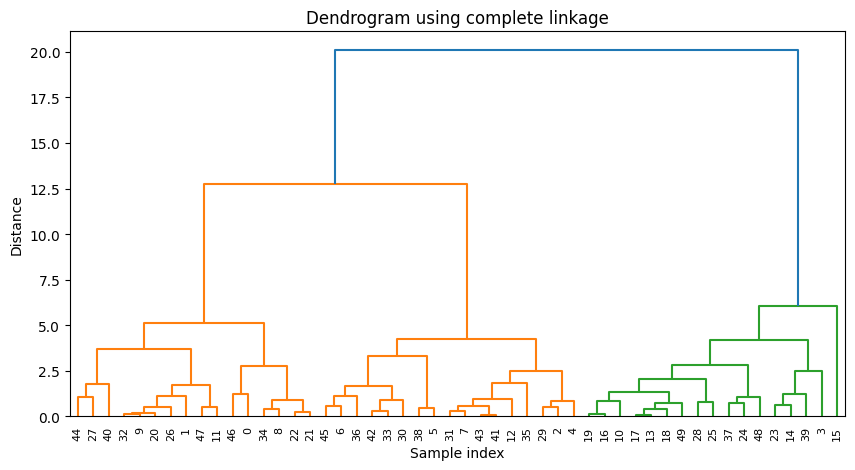

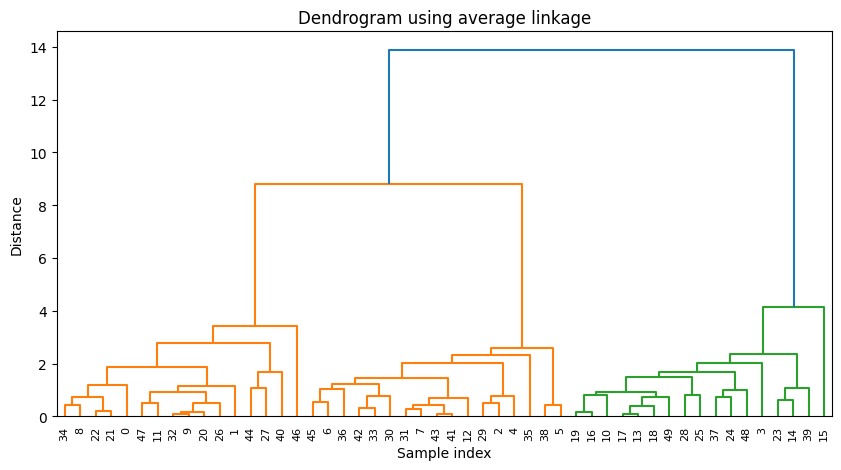

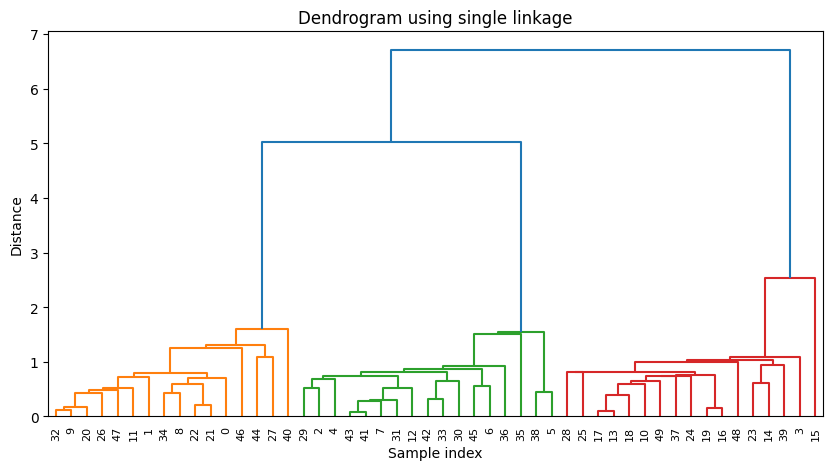

In [30]:
# different linkage methods

linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    linked = linkage(X, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(linked, distance_sort='descending', show_leaf_counts=False)
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

In [32]:
# using silhouette score for finding the best cluseter number

ks = range(2, 12)
for k in ks:
    cluseter_labels = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    ).fit_predict(X)
    score = silhouette_score(X, cluseter_labels)
    print(f"k = {k}, Silhouette score: {score:.4f}")


k = 2, Silhouette score: 0.6744
k = 3, Silhouette score: 0.7897
k = 4, Silhouette score: 0.6650
k = 5, Silhouette score: 0.5329
k = 6, Silhouette score: 0.5716
k = 7, Silhouette score: 0.4172
k = 8, Silhouette score: 0.4522
k = 9, Silhouette score: 0.4276
k = 10, Silhouette score: 0.3953
k = 11, Silhouette score: 0.4120


k = 3, gives the best score

## **Divisive Hierarchichal clustering**